vamos considerar um exemplo simples de classificação usando SVM para distinguir entre duas classes de pontos em um plano 2D.

Imagine que temos dois conjuntos de pontos, um representado pela cor azul e outro pela cor vermelha. Queremos criar um modelo SVM para separar esses pontos em suas respectivas classes.

In [1]:
import matplotlib.pyplot as plt
from sklearn import svm
import numpy as np

In [2]:
# Dados de entrada
pontos_azuis = np.array([[1, 2], [1.5, 1.8], [5, 8], [8, 8], [1, 0.6], [9, 11]])
pontos_vermelhos = np.array([[5, 6], [7, 7], [6, 8], [1, 1], [2, 2], [8, 9]])

In [3]:
# Preparando os dados de treinamento e suas respectivas classes
X = np.vstack((pontos_azuis, pontos_vermelhos))
y = np.hstack((np.zeros(len(pontos_azuis)), np.ones(len(pontos_vermelhos))))

In [4]:
# Criando o classificador SVM
clf = svm.SVC(kernel='linear', C=1.0)
clf.fit(X, y)

SVC(kernel='linear')

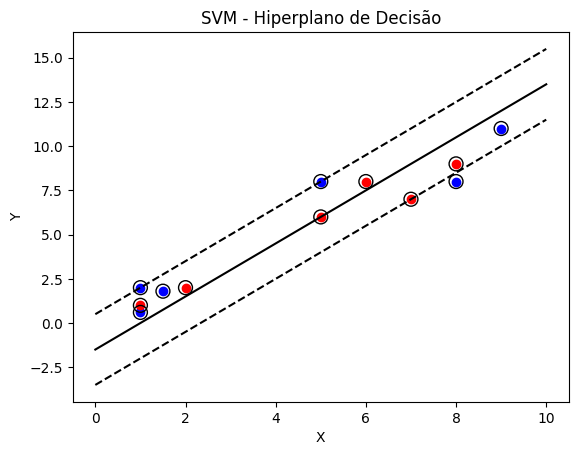

In [5]:
# Função para visualizar os dados e o hiperplano de decisão
def plot_svm_decision_boundary():
    plt.scatter(pontos_azuis[:,0], pontos_azuis[:,1], color='blue')
    plt.scatter(pontos_vermelhos[:,0], pontos_vermelhos[:,1], color='red')

    # Obter os vetores de suporte
    sv = clf.support_vectors_
    plt.scatter(sv[:,0], sv[:,1], marker='o', s=100, edgecolor='k', facecolor='none')

    # Hiperplano de decisão
    w = clf.coef_[0]
    a = -w[0] / w[1]
    xx = np.linspace(0, 10)
    yy = a * xx - clf.intercept_[0] / w[1]

    # Margens
    margin = 1 / np.sqrt(np.sum(clf.coef_ ** 2))
    yy_down = yy - np.sqrt(1 + a**2) * margin
    yy_up = yy + np.sqrt(1 + a**2) * margin

    plt.plot(xx, yy, 'k-')
    plt.plot(xx, yy_down, 'k--')
    plt.plot(xx, yy_up, 'k--')

    plt.xlabel('X')
    plt.ylabel('Y')
    plt.title('SVM - Hiperplano de Decisão')
    plt.show()

# Chamando a função para exibir o gráfico
plot_svm_decision_boundary()

Neste exemplo, geramos pontos de duas classes (azul e vermelho) em um espaço bidimensional (X e Y). Usamos a biblioteca scikit-learn para criar um modelo SVM com um kernel linear.

A função plot_svm_decision_boundary() plota os pontos de dados no gráfico e destaca os vetores de suporte, além de desenhar o hiperplano de decisão encontrado pelo SVM para separar as duas classes.

O hiperplano de decisão é representado pela linha sólida, enquanto as linhas tracejadas indicam a margem de separação. Os pontos de dados são separados pelo hiperplano de maneira a maximizar a margem entre as classes, permitindo uma classificação adequada de novos pontos.